# Homework \#1 (4 points)
Due June 24 @ 11:59pm

## Submission requirements
Upload a **single PDF file** of your IJulia notebook for this entire assigment. Clearly denote which question each section of your PDF corresponds to.

## Problem 1 - Getting Started with Julia/JuMP (1 point)

Model the following problem in JuMP:

$\begin{align*}
\min & \ 0.5x_1 - 7x_2 + (1/3)x_3\\
\text{s.t.} &\  x_4  = 5\\
& x_1 + x_2 - 2x_3 + 0.5x_4 \geq 10\\
& -x_1 + 3x_2 \leq -2\\
& x_1, x_3 \geq 0, x_2  \leq 0
\end{align*}$

Solve this problem using Clp, ECOS, and SCS solvers.  Compare the answers found by each solver by answering the following:  
* Which solver is most accurate?  
* Which is fastest (use the @time macro)? (Note: you should run each solver several times to get an average time.)
    * Can you speculate as to why? 
* If there is no clear difference between the solvers, can you think of some factors that might contribute to solver speed differences? 


In [3]:
using JuMP, Clp
m=Model(Clp.Optimizer)
@variable(m,x1>=0)
@variable(m,x2<=0)
@variable(m,x3>=0)

@constraint(m,x1+x2-2*x3+0.5*4>=10)
@constraint(m,-x1+3*x2<=-2)

@objective(m,Min,0.5*x1-7*x2+(1/3)*x3)

@time optimize!(m)

println(m)
println()
println("x1=",value(x1))
println("x2=",value(x2))
println("x3=",value(x3))
println("objective=",objective_value(m))

  0.003586 seconds (1.72 k allocations: 120.172 KiB)
Min 0.5 x1 - 7 x2 + 0.3333333333333333 x3
Subject to
 x1 + x2 - 2 x3 ≥ 8.0
 -x1 + 3 x2 ≤ -2.0
 x1 ≥ 0.0
 x3 ≥ 0.0
 x2 ≤ 0.0


x1=8.0
x2=0.0
x3=0.0
objective=4.0
Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-5) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 4
Coin0511I After Postsolve, objective 4, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 4 - 0 iterations time 0.002, Presolve 0.00


In [12]:
using JuMP, ECOS
m=Model(ECOS.Optimizer)
@variable(m,x1>=0)
@variable(m,x2<=0)
@variable(m,x3>=0)

@constraint(m,x1+x2-2*x3+0.5*4>=10)
@constraint(m,-x1+3*x2<=-2)

@objective(m,Min,0.5*x1-7*x2+(1/3)*x3)

@time optimize!(m)

println(m)
println()
println("x1=",value(x1))
println("x2=",value(x2))
println("x3=",value(x3))
println("objective=",objective_value(m))

  1.847151 seconds (3.65 M allocations: 183.210 MiB, 3.43% gc time)
Min 0.5 x1 - 7 x2 + 0.3333333333333333 x3
Subject to
 x1 + x2 - 2 x3 ≥ 8.0
 -x1 + 3 x2 ≤ -2.0
 x1 ≥ 0.0
 x3 ≥ 0.0
 x2 ≤ 0.0


x1=8.000000000133166
x2=3.483072637739863e-11
x3=-2.1775867805165598e-11
objective=3.999999999815509

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.149e+00  +9.946e+00  +3e+01  5e-01  5e-01  1e+00  5e+00    ---    ---    1  1  - |  -  - 
 1  +4.288e+00  +5.816e+00  +2e+00  5e-02  7e-02  3e-01  4e-01  0.9183  1e-03   0  0  0 |  0  0
 2  +3.987e+00  +4.015e+00  +5e-02  9e-04  1e-03  4e-03  9e-03  0.9800  7e-04   0  0  0 |  0  0
 3  +4.000e+00  +4.000e+00  +5e-04  1e-05  1e-05  5e-05  9e-05  0.9890  1e-04   1  0  0 |  0  0
 4  +4.000e+00  +4.000e+00  +6e-06  1e-07  2e-07  5e-07  1e-06  0.9890  1e-04   1  0  0 |  0  0
 5  +4.000e+00  +4.000e+00  +7e-08  1e-

In [13]:
using JuMP, SCS
m=Model(SCS.Optimizer)
@variable(m,x1>=0)
@variable(m,x2<=0)
@variable(m,x3>=0)

@constraint(m,x1+x2-2*x3+0.5*4>=10)
@constraint(m,-x1+3*x2<=-2)

@objective(m,Min,0.5*x1-7*x2+(1/3)*x3)

@time optimize!(m)

println(m)
println()
println("x1=",value(x1))
println("x2=",value(x2))
println("x3=",value(x3))
println("objective=",objective_value(m))

  1.738168 seconds (3.35 M allocations: 169.528 MiB, 2.50% gc time)
Min 0.5 x1 - 7 x2 + 0.3333333333333333 x3
Subject to
 x1 + x2 - 2 x3 ≥ 8.0
 -x1 + 3 x2 ≤ -2.0
 x1 ≥ 0.0
 x3 ≥ 0.0
 x2 ≤ 0.0


x1=8.000000449423341
x2=8.123520077529598e-8
x3=5.025821929453947e-8
objective=3.9999996728180056
----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 8, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 3, constraints m = 5
Cones:	linear vars: 5
Setup time: 3.51e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
-------------------------------------------------

Which solver is most accurate?\
The Clp is most accurate.

Which is fastest (use the @time macro)?\
The Clp is the fastest solver with average time 0.001131s.

Can you speculate as to why?\
Clp is faster than SCS and ECOS since they also offer us High-level interfaces which need more time to generate.

If there is no clear difference between the solvers, can you think of some factors that might contribute to solver speed differences?\
Different algorithms used to implement the solver will result in different calculation speeds of the solver.

## Problem 2 - DnD (Decision Variables and Drawing) (1 point)

Prof. Smith is rolling up a new character for her optimization-based role-playing campaign and she wants to use linear programming to help make some important decisions. She is playing a 4th-level Dragonborn and is trying to decide how many pounds of iron and steel she wants to use to build a sword. Every pound of steel adds a "slowness" factor of 1, whereas every pound of iron adds a "slowness" factor of -3 (reduces slowness by 3). She would like to combine iron and steel to meet the requirements given below while minimizing the total "slowness" of her character. 

The table below summarizes several characteristics of each pound of iron and steel. 

|Material | Damage (per pound) |Protection (per pound)| Surface area/pound|
|--------:|---------------:|---------------:|---------:|
|Iron|-1 points|2 points|1 $m^2$|
|Steel|1 points|1 point|2 $m^2$|

Prof. Smith wants to ensure that her total damage is at least -2 points and her total protection is at least 6 points. Furthermore, her character can carry a sword with a maximum surface area of 8 $m^2$.


**(a)  Formulate a linear program to help Prof. Smith figure out how many pounds of each type of material (iron and steel) she should purchase to minimize her character's "slowness." State the math model, then code and solve the model using Julia.**

In [6]:
using JuMP, SCS
m=Model(SCS.Optimizer)
@variable(m,x>=0)
@variable(m,y>=0)

@constraint(m,-x+y>=-2)
@constraint(m,2*x+y>=6)
@constraint(m,x+2*y<=8)

@objective(m,Min,-3*x+y)

@time optimize!(m)

println(m)
println()
println("Iron=",value(x),"pounds")
println("Steel=",value(y),"pounds")
println("slowness=",objective_value(m))

  0.059412 seconds (155.16 k allocations: 7.797 MiB)
Min -3 x + y
Subject to
 -x + y ≥ -2.0
 2 x + y ≥ 6.0
 x + 2 y ≤ 8.0
 x ≥ 0.0
 y ≥ 0.0


Iron=3.9999999998936704pounds
Steel=2.0000000000484155pounds
slowness=-9.999999999632594
----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 8, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 2, constraints m = 5
Cones:	linear vars: 5
Setup time: 3.42e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.62e+19  2.94e+18  7.76e

**(b)  Code the same model once again, this time separating the parameters from the solution as we did in class (see Top Brass examples).  Confirm that you obtain the same solution as in part (a).**

In [7]:
using JuMP, SCS
m=Model(SCS.Optimizer)
material_type=[:iron,:steel]
damage=Dict(:iron=>-1,:steel=>1)
protection=Dict(:iron=>2,:steel=>1)
area=Dict(:iron=>1,:steel=>2)
slowness=Dict(:iron=>-3,:steel=>1)
@variable(m,material[material_type]>=0)

@objective(m,Min,sum(slowness[i]*material[i] for i in material_type))

@constraint(m,sum(damage[i]*material[i] for i in material_type)>=-2)
@constraint(m,sum(protection[i]*material[i] for i in material_type)>=6)
@constraint(m,sum(area[i]*material[i] for i in material_type)<=8)

optimize!(m)
println(m)
println()
println(value.(material))
println("slowness=",objective_value(m))

Min -3 material[iron] + material[steel]
Subject to
 -material[iron] + material[steel] ≥ -2.0
 2 material[iron] + material[steel] ≥ 6.0
 material[iron] + 2 material[steel] ≤ 8.0
 material[iron] ≥ 0.0
 material[steel] ≥ 0.0


1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, Symbol[:iron, :steel]
And data, a 2-element Array{Float64,1}:
 3.9999999998936704
 2.0000000000484155
slowness=-9.999999999632594
----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 8, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 2, constraints m = 5
Cones:	linear vars: 5
Setup time: 2.54e-05s
---------------------------------------------------------------

**We get same result in (a) and (b): we need to buy 3.9999999998936704 pounds Iron and 2.0000000000484155 pounds Steel to reach minimum slowness which is -9.999999999632594**

**(c) Solve the problem graphically by plotting the feasible set and at least two isoprofit lines for the objective function. Confirm that you obtain the same solution as in the previous parts.**

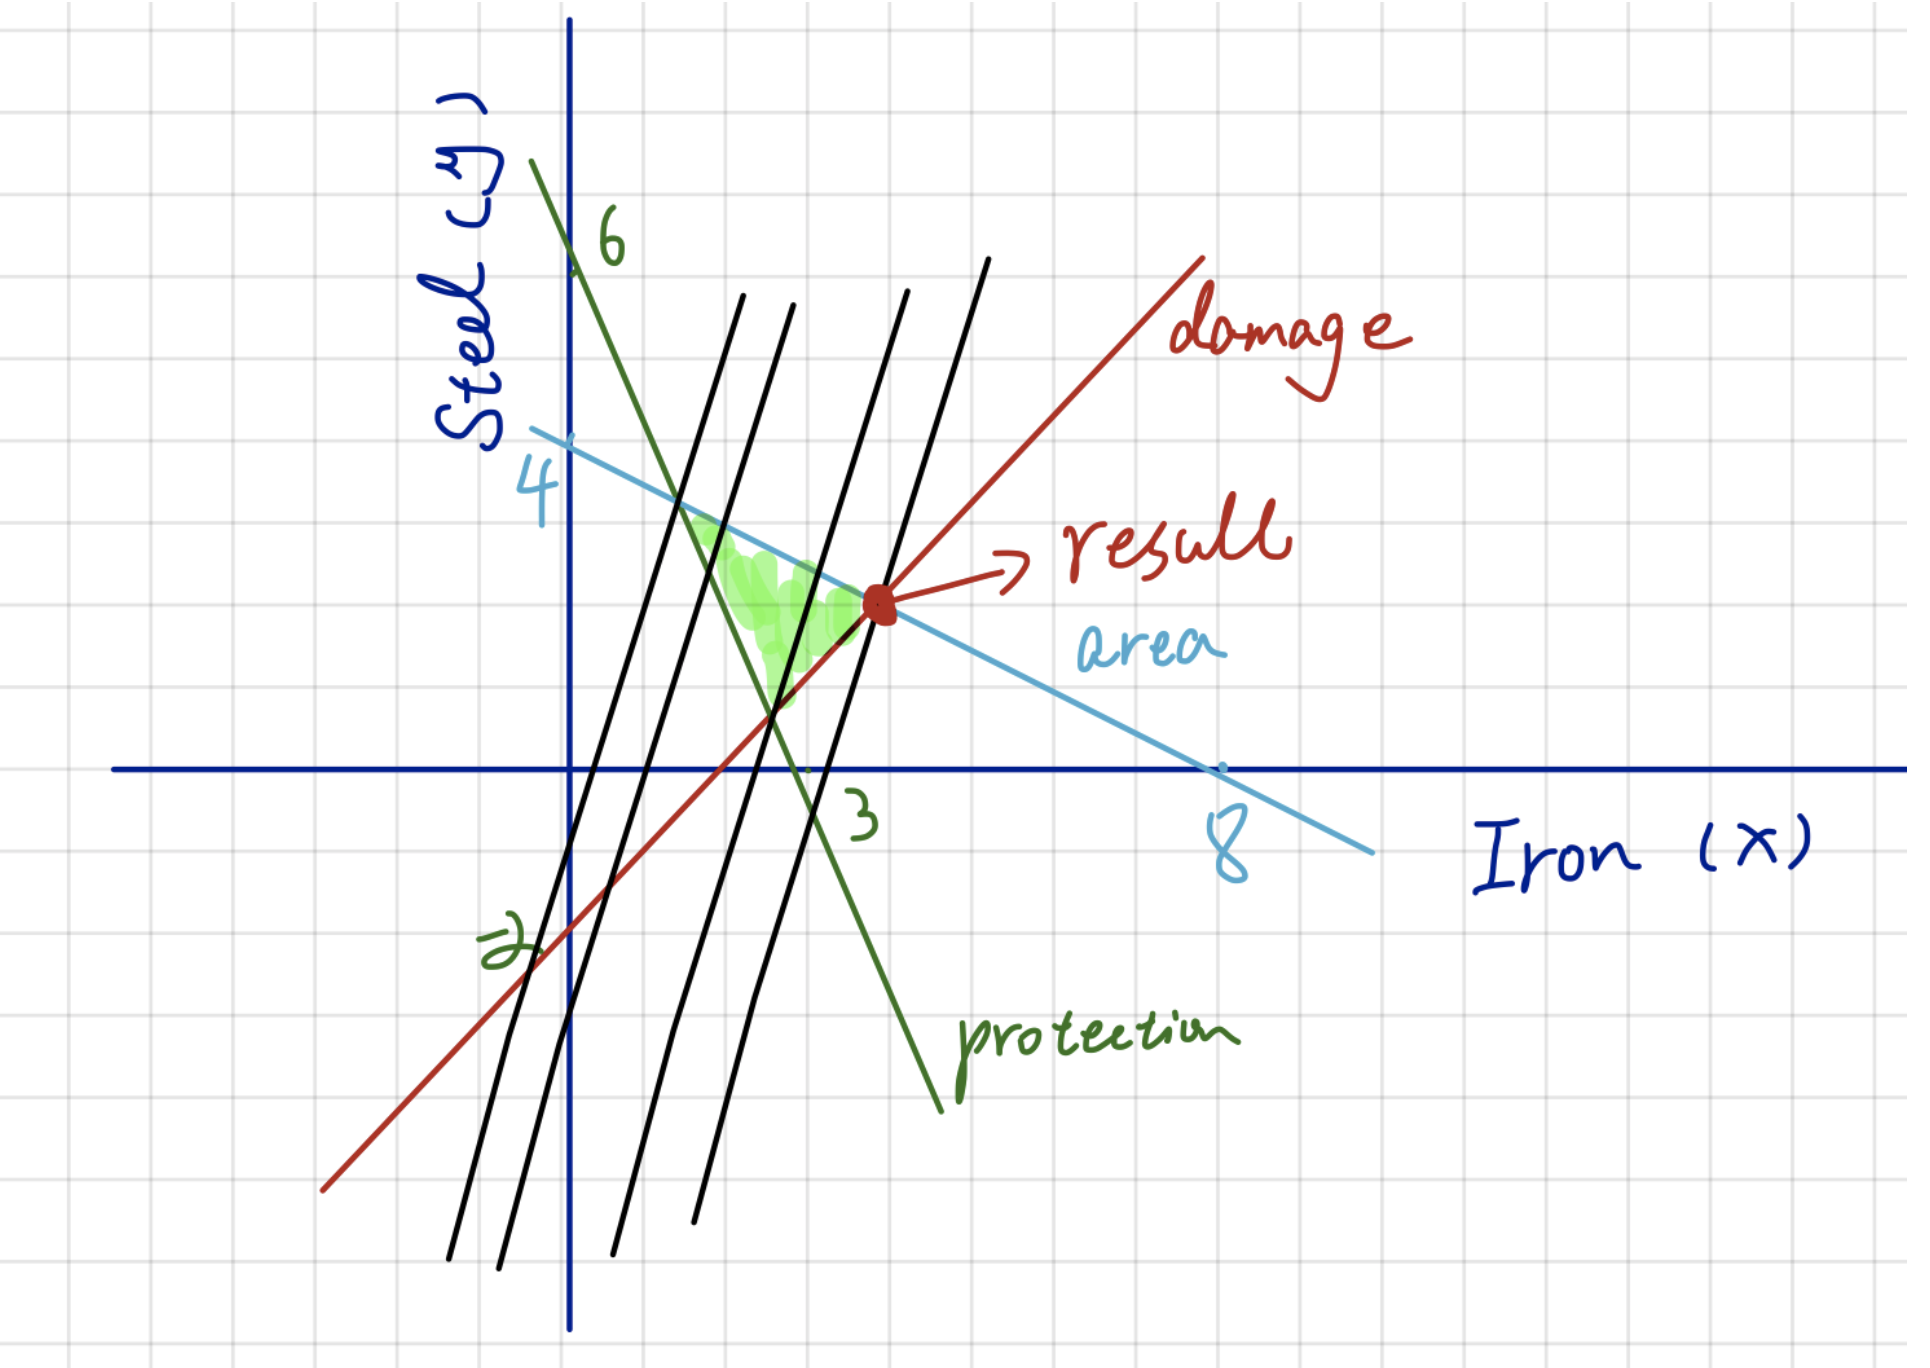
**We get same result at the right most point of the feasible set.**

## Problem 3 - Standard Form (1 point)

Consider the following LP:

$\begin{align*}
\min & \ (1/2)x_1 - 7x_2 + (1/3)x_3\\
\text{s.t.} &\  x_4  = 5\\
& x_1 + x_2 - 2x_3 + 0.5x_4 \geq 10\\
& -x_1 + 3x_2 \leq -2\\
& x_1, x_3 \geq 0, x_2  \leq 0
\end{align*}$


**(a) Convert the problem to standard form.**\
Replacing -x2 with a

$\max \limits_{x_{1},a,x_{3},x_{4}}\{-\frac{1}{2}x_{1}-7a-\frac{1}{3}x_{3}\}$

$-x_{4}<=-5$

$x_{4}<=5$

$-x_{1}+a+2x_{3}-0.5x_{4}<=-10$

$-x_{1}-3a<=-2$

$x_{1},a,x_{3}>=0$





(b) What are $A$, $b$, $c$,and $x$?  Be sure to explain how the decision variables of your transformed LP relate to those of the original LP. 

$A=\left[ 
\begin{array}{ccc} 
0 & 0 & 0 & -1 \\ 
0 & 0 & 0 & 1\\ 
-1 & 1 & 2 & -\frac{1}{2}\\
-1 & -3 & 0 & 0
\end{array} 
\right]$&emsp;&emsp;&emsp;
$b=\left[ 
\begin{array}{ccc} 
-5 \\ 
5 \\ 
-10\\
-2
\end{array} 
\right]$&emsp;&emsp;&emsp;
$c=\left[ 
\begin{array}{ccc} 
-\frac{1}{2} \\ 
-7\\ 
-\frac{1}{3}\\
0
\end{array} 
\right]$&emsp;&emsp;&emsp;
$x=\left[ 
\begin{array}{ccc} 
x_{1} \\ 
a\\ 
x_{3}\\
x_{4}
\end{array} 
\right]$



(c) Solve the standard-form LP in Julia and report the objective value and the value of each decision variable in an optimal solution to the original LP. 

In [8]:
#standard form
using JuMP, Clp
m=Model(Clp.Optimizer)
@variable(m,x1>=0)
@variable(m,a>=0)
@variable(m,x3>=0)
@variable(m,x4>=0)

@constraint(m,-x4<=-5)
@constraint(m,x4<=5)
@constraint(m,-x1+a+2*x3-0.5*x4<=-10)
@constraint(m,-x1-3*a<=-2)

@objective(m,Max,-0.5*x1-7*a-(1/3)*x3)

@time optimize!(m)

println(m)
println()
println("x1=",value(x1))
println("x2=",-value(a))
println("x3=",value(x3))
println("x4=",value(x4))
println("objective=",-objective_value(m))

  0.084835 seconds (95.13 k allocations: 4.706 MiB)
Max -0.5 x1 - 7 a - 0.3333333333333333 x3
Subject to
 -x4 ≤ -5.0
 x4 ≤ 5.0
 -x1 + a + 2 x3 - 0.5 x4 ≤ -10.0
 -x1 - 3 a ≤ -2.0
 x1 ≥ 0.0
 a ≥ 0.0
 x3 ≥ 0.0
 x4 ≥ 0.0


x1=7.5
x2=-0.0
x3=0.0
x4=5.0
objective=3.75
Coin0506I Presolve 0 (-4) rows, 0 (-4) columns and 0 (-8) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value -3.75
Coin0511I After Postsolve, objective -3.75, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -3.75 - 0 iterations time 0.002, Presolve 0.00


In [9]:
#original form
using JuMP, Clp
m=Model(Clp.Optimizer)
@variable(m,x1>=0)
@variable(m,x2<=0)
@variable(m,x3>=0)

@constraint(m,x1 + x2-2*x3 + 0.5*5>=10)
@constraint(m,-x1+3*x2<=-2)

@objective(m,Min,0.5*x1-7*x2+(1/3)*x3)

@time optimize!(m)

println(m)
println()
println("x1=",value(x1))
println("x2=",-value(x2))
println("x3=",value(x3))
println("x4=",5)
println("objective=",objective_value(m))

  0.001167 seconds (1.72 k allocations: 120.172 KiB)
Min 0.5 x1 - 7 x2 + 0.3333333333333333 x3
Subject to
 x1 + x2 - 2 x3 ≥ 7.5
 -x1 + 3 x2 ≤ -2.0
 x1 ≥ 0.0
 x3 ≥ 0.0
 x2 ≤ 0.0


x1=7.5
x2=-0.0
x3=0.0
x4=5
objective=3.75
Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-5) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 3.75
Coin0511I After Postsolve, objective 3.75, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 3.75 - 0 iterations time 0.002, Presolve 0.00


**We get same result as the standard form.**

## Problem 4 - This problem is b-ORE-ing (1 point)


A mining company creatively named "MineCo" is trying to determine their daily mining plan. There are forty different locations within the mine where ore can be extracted, and at each of the forty locations the ore has slightly different percentages of 7 "quality attributes." MineCo has to monitor each of these 7 attributes of the ore they sell. Assume all ore that is extracted is taken to a processing center where it is perfectly blended before it is sent to the buyers, and quality is measured after the ore is blended. MineCo can extract up to 1000 total tons today.

The ore extracted from each site also has differing total quality, which means each location can be mined to produce different value (in \$) per ton extracted.

The full data on each mining location is provided in "mineco.csv" on Canvas.The data has the following structure, where each row shows a different mining site and each column shows the relevant ore characteristics. You can use the code snippet provided below to read the .csv file and load it into Julia, or you can read/load the data in any way you choose.


|Site | Value/ton (\$) | % Gold |% Carbon| % Iron|$\dotsm$ |
|--------:|---------------:|---------------:|---------:|---------:|---------:|
| Minimum % | |3 |2 |4| $\dotsm$|
| Maximum % | |11 |9 |15| $\dotsm$|
|1| 2349| 6| 16|16 |  $\dotsm$|
|2| 2397|10 |12 |1 | $\dotsm$ |
|$\vdots$|$\vdots$ |$\vdots$ |$\vdots$ |$\vdots$ |$\ddots$ |


(a) Formulate a __linear__ program that MineCo can use to determine 
how many tons of ore to extract from each site today in order to maximize their total value. Give a general form (no numbers) of the math model.


Suppose we extract $x_{1},x_{2}...,x_{40}$ tons of ore from each site.

$\max \limits_{x_{1},x_{2},x_{3}...,x_{40}}\\sum_{i=1}^{40}x_{i}*val_{i}\$

$gold_{min}\le\frac{\sum_{i=1}^{40}x_{i}*gold_{i}}{\sum_{i=1}^{40}x_{i}}\le gold_{max}$

$carbon_{min}\le\frac{\sum_{i=1}^{40}x_{i}*carbon_{i}}{\sum_{i=1}^{40}x_{i}}\le carbon_{max}$

$iron_{min}\le\frac{\sum_{i=1}^{40}x_{i}*iron_{i}}{\sum_{i=1}^{40}x_{i}}\le iron_{max}$

$copper_{min}\le\frac{\sum_{i=1}^{40}x_{i}*copper_{i}}{\sum_{i=1}^{40}x_{i}}\le copper_{max}$

$silver_{min}\le\frac{\sum_{i=1}^{40}x_{i}*silver_{i}}{\sum_{i=1}^{40}x_{i}}\le silver_{max}$

$coal_{min}\le\frac{\sum_{i=1}^{40}x_{i}*coal_{i}}{\sum_{i=1}^{40}x_{i}}\le coal_{max}$

$silica_{min}\le\frac{\sum_{i=1}^{40}x_{i}*silica_{i}}{\sum_{i=1}^{40}x_{i}}\le silica_{max}$

$\sum_{i=1}^{40}x_{i}<=1000$

$x_{1},x_{2},x_{3}...,x_{40}>=0$



(b) Implement and solve this instance of the model in Julia/JuMP.  Display the optimal objective value and the optimal mining plan (in tons extracted from each site). 

In [11]:
using DataFrames, CSV, NamedArrays,JuMP,Clp
m=Model(Clp.Optimizer)
data= CSV.read("mineco.csv")
mine_array = convert(Array,data);

site_num=[:x1,:x2,:x3,:x4,:x5,:x6,:x7,:x8,:x9,:x10,:x11,:x12,:x13,:x14,:x15,:x16,:x17,:x18,:x19,:x20,:x21,:x22,:x23,:x24,:x25,:x26,:x27,:x28,:x29,:x30,:x31,:x32,:x33,:x34,:x35,:x36,:x37,:x38,:x39,:x40]

ore_val = Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,2])))
gold=Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,3])))
carbon=Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,4])))
iron=Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,5])))
copper=Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,6])))
silver=Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,7])))
coal=Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,8])))
silica=Dict(zip(site_num,convert(Array{Int64},mine_array[3:end,9])))

@variable(m,var[site_num]>=0)

@objective(m,Max,sum(ore_val[i]*var[i] for i in site_num))

@constraint(m,sum(var[i] for i in site_num)<=1000)
@constraint(m,sum(var[i]*gold[i] for i in site_num)/1000>=3)
@constraint(m,sum(var[i]*gold[i] for i in site_num)/1000<=11)

@constraint(m,sum(var[i]*carbon[i] for i in site_num)/1000>=1)
@constraint(m,sum(var[i]*carbon[i] for i in site_num)/1000<=9)

@constraint(m,sum(var[i]*iron[i] for i in site_num)/1000>=4)
@constraint(m,sum(var[i]*iron[i] for i in site_num)/1000<=15)

@constraint(m,sum(var[i]*copper[i] for i in site_num)/1000>=0)
@constraint(m,sum(var[i]*copper[i] for i in site_num)/1000<=5)

@constraint(m,sum(var[i]*silver[i] for i in site_num)/1000>=0)
@constraint(m,sum(var[i]*silver[i] for i in site_num)/1000<=6)

@constraint(m,sum(var[i]*coal[i] for i in site_num)/1000>=2)
@constraint(m,sum(var[i]*coal[i] for i in site_num)/1000<=13)

@constraint(m,sum(var[i]*silica[i] for i in site_num)/1000>=1)
@constraint(m,sum(var[i]*silica[i] for i in site_num)/1000<=4)

optimize!(m)
println(m)
println()
println(value.(var))
println("The optimal objective value = ",objective_value(m))

Max 2349 var[x1] + 2397 var[x2] + 2066 var[x3] + 2257 var[x4] + 2117 var[x5] + 2144 var[x6] + 2039 var[x7] + 2011 var[x8] + 2204 var[x9] + 2030 var[x10] + 2088 var[x11] + 2026 var[x12] + 2405 var[x13] + 2418 var[x14] + 2190 var[x15] + 2275 var[x16] + 2163 var[x17] + 2216 var[x18] + 2405 var[x19] + 2430 var[x20] + 2497 var[x21] + 2260 var[x22] + 2455 var[x23] + 2245 var[x24] + 2051 var[x25] + 2220 var[x26] + 2209 var[x27] + 2358 var[x28] + 2464 var[x29] + 2368 var[x30] + 2231 var[x31] + 2376 var[x32] + 2058 var[x33] + 2227 var[x34] + 2383 var[x35] + 2201 var[x36] + 2239 var[x37] + 2277 var[x38] + 2162 var[x39] + 2470 var[x40]
Subject to
 0.006 var[x1] + 0.01 var[x2] + 0.004 var[x3] + 0.02 var[x4] + 0.014 var[x5] + 0.011 var[x6] + 0.003 var[x7] + 0.018000000000000002 var[x8] + 0.007 var[x9] + 0.017 var[x10] + 0.008 var[x11] + 0.002 var[x12] + 0.012 var[x14] + 0.019 var[x15] + 0.004 var[x16] + 0.015 var[x18] + 0.002 var[x19] + 0.02 var[x20] + 0.012 var[x21] + 0.016 var[x22] + 0.003 var[x2


1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, Symbol[:x1, :x2, :x3, :x4, :x5, :x6, :x7, :x8, :x9, :x10  …  :x31, :x32, :x33, :x34, :x35, :x36, :x37, :x38, :x39, :x40]
And data, a 40-element Array{Float64,1}:
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
 417.76970869638944
   0.0             
   0.0             
  52.14818351436423
   0.0             
   0.0             
 173.12995897751637
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
   0.0             
 181.17111966880478
 114.76872239777357
   0.0             
   0.0             
   0.0             

|Site | Weight/tons| 
|--------:|---------------:|
|$\vdots$|$\vdots$ |
|14| 417.76970869638944|
|$\vdots$|$\vdots$ |
|17| 52.14818351436423|
|$\vdots$|$\vdots$ |
|20| 173.12995897751637|
|$\vdots$|$\vdots$ |
|34| 181.17111966880478|
|35| 114.76872239777357|
|$\vdots$|$\vdots$ |
|40| 61.01230674515169|

**The optimal objective value = 2.3713318235216513e6.**